In [1]:
# Wrangling
import pandas as pd
import numpy as np
import os

# # import wrangle.py
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

# Statistical Tests
from math import sqrt
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

# Models
from sklearn.cluster import KMeans

# Custom modules
import util

# Custom notebook settings for max rows and columns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

# Acquire

In [2]:
# Read csv file into pandas DataFrame.
file = "/Users/ultimate/codeup-data-science/pet_projects/2017-2018 FNDDS At A Glance - FNDDS Nutrient Values.xlsx"
df = pd.read_excel(file)
df

,FNDDS Nutrient Values\n2017-2018 Food and Nutrient Database for Dietary Studies - At A Glance,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68
0,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Retinol (mcg),"Vitamin A, RAE (mcg_RAE)","Carotene, alpha (mcg)","Carotene, beta (mcg)","Cryptoxanthin, beta (mcg)",Lycopene (mcg),Lutein + zeaxanthin (mcg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),Folic acid (mcg),"Folate, food (mcg)","Folate, DFE (mcg_DFE)","Folate, total (mcg)","Choline, total (mg)",Vitamin B-12 (mcg),"Vitamin B-12, added\n(mcg)",Vitamin C (mg),Vitamin D (D2 + D3) (mcg),Vitamin E (alpha-tocopherol) (mg),"Vitamin E, added\n(mg)",Vitamin K (phylloquinone) (mcg),Calcium (mg),Phosphorus (mg),Magnesium (mg),Iron\n(mg),Zinc\n(mg),Copper (mg),Selenium (mcg),Potassium (mg),Sodium (mg),Caffeine (mg),Theobromine (mg),Alcohol (g),4:0\n(g),6:0\n(g),8:0\n(g),10:0\n(g),12:0\n(g),14:0\n(g),16:0\n(g),18:0\n(g),16:1\n(g),18:1\n(g),20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
1,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0,4.38,2.009,1.658,0.497,14,60,61,0,7,0,0,0,0.014,0.036,0.177,0.011,0,5,5,5,16,0.05,0,5,0.1,0.08,0,0.3,32,14,3,0.03,0.17,0.052,1.8,51,17,0,0,0,0,0,0,0.063,0.256,0.321,0.919,0.293,0.129,1.475,0.04,0,0.374,0.052,0,0.026,0,0,0,87.5
2,11100000,"Milk, NFS",1004,"Milk, reduced fat",51,3.34,4.87,4.89,0,1.99,1.164,0.426,0.065,8,58,59,0,4,0,0,0,0.057,0.137,0.11,0.06,0,1,1,1,17.9,0.56,0,0.1,1.1,0.03,0,0.2,126,103,12,0,0.42,0.001,1.9,157,39,0,0,0,0.043,0.033,0.022,0.052,0.06,0.19,0.537,0.194,0.03,0.433,0.002,0,0.069,0.007,0,0.003,0,0.001,0,89.04
3,11111000,"Milk, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0,3.2,1.86,0.688,0.108,12,31,32,0,7,0,0,0,0.056,0.138,0.105,0.061,0,0,0,0,17.8,0.54,0,0,1.1,0.05,0,0.3,123,101,12,0,0.41,0.001,1.9,150,38,0,0,0,0.067,0.054,0.034,0.084,0.097,0.303,0.857,0.309,0.047,0.694,0.004,0,0.115,0.012,0,0.004,0.001,0.002,0,88.1
4,11111100,"Milk, low sodium, whole",1002,"Milk, whole",61,3.1,4.46,4.46,0,3.46,2.154,0.999,0.128,14,28,29,0,7,0,0,0,0.02,0.105,0.043,0.034,0,5,5,5,16,0.36,0,0.9,1.3,0.08,0,0.3,101,86,5,0.05,0.38,0.01,2,253,3,0,0,0,0.112,0.066,0.039,0.087,0.097,0.348,0.91,0.419,0.077,0.87,0,0,0.078,0.05,0,0,0,0,0,88.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7079,99997802,Tomatoes as ingredient in omelet,9999,Not included in a food category,25,1.11,5.48,3.42,1.6,0.23,0.038,0.035,0.094,0,0,43,103,464,0,2597,142,0.045,0.024,0.637,0.104,0,14,14,14,7.4,0,0,18.2,0,0.6,0,8.8,14,30,13,0.33,0.21,0.071,0.1,278,6,0,0,0,0,0,0,0,0,0,0.028,0.009,0.001,0.034,0,0,0.089,0.004,0,0,0,0,0,92.57
7080,99997804,Other vegetables as ingredient in omelet,9999,Not included in a food

In [3]:
def first_row_to_col_header(df):

    # Assign row as column headers
    df.columns = df.iloc[0]

    # Using DataFrame.rename()
    df1 = df.rename(columns=df.iloc[1])

    # Convert row to header and remove the row
    df1 = df.rename(columns=df.iloc[0]).loc[1:]

    # Using DataFrame.rename() to convert row to column header
    df.rename(columns=df.iloc[1], inplace = True)

    # Using DataFrame.values[]
    header_row = df.iloc[0]
    df1 = pd.DataFrame(df.values[1:], columns=header_row)
    return df1

In [4]:
df = first_row_to_col_header(df)

# Prepare

In [5]:
df.describe()

,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Retinol (mcg),"Vitamin A, RAE (mcg_RAE)","Carotene, alpha (mcg)","Carotene, beta (mcg)","Cryptoxanthin, beta (mcg)",Lycopene (mcg),Lutein + zeaxanthin (mcg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),Folic acid (mcg),"Folate, food (mcg)","Folate, DFE (mcg_DFE)","Folate, total (mcg)","Choline, total (mg)",Vitamin B-12 (mcg),"Vitamin B-12, added\n(mcg)",Vitamin C (mg),Vitamin D (D2 + D3) (mcg),Vitamin E (alpha-tocopherol) (mg),"Vitamin E, added\n(mg)",Vitamin K (phylloquinone) (mcg),Calcium (mg),Phosphorus (mg),Magnesium (mg),Iron\n(mg),Zinc\n(mg),Copper (mg),Selenium (mcg),Potassium (mg),Sodium (mg),Caffeine (mg),Theobromine (mg),Alcohol (g),4:0\n(g),6:0\n(g),8:0\n(g),10:0\n(g),12:0\n(g),14:0\n(g),16:0\n(g),18:0\n(g),16:1\n(g),18:1\n(g),20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
count,7083,7083,7083,7083,7083,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083,7083,7083,7083,7083,7083,7083,7083,7083.0,7083.0,7083.0,7083.0,7083,7083,7083,7083,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083,7083,7083,7083.0,7083.00,7083.0,7083.0,7083,7083,7083,7083,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0
unique,7083,7083,167,167,608,2107.0,3113.0,1788.0,160.0,2100.0,3474.0,3623.0,3072.0,274,374,496,362,871,121,677,735,666.0,634.0,3317.0,712.0,201,178,320,260,1108.0,453.0,141.0,453.0,134.0,511.0,115.0,630.0,407,517,219,621.0,559.00,595.0,539.0,670,1028,60,151,55.0,390.0,293.0,319.0,432.0,569.0,986.0,2791.0,1825.0,704.0,3517.0,339.0,129.0,2869.0,824.0,106.0,198.0,235.0,132.0,280.0,3884.0
top,11000000,"Milk, human",2402,Fish,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,0,21,0.0,0.01,0.0,0.0,70,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
freq,1,1,340,340,101,202.0,430.0,663.0,1642.0,228.0,322.0,336.0,300.0,2443,2650,1411,5180,2283,5011,6033,2235,217.0,169.0,165.0,267.0,4234,642,422,423,190.0,2290.0,6621.0,2347.0,3675.0,382.0,6758.0,737.0,164,126,262,168.0,108.00,116.0,253.0,57,94,6590,6708,6982.0,3975.0,4208.0,3516.0,2566.0,2060.0,934.0,326.0,448.0,840.0,366.0,1794.0,5377.0,306.0,498.0,6176.0,3025.0,4890.0,4505.0,4914.0,25.0


In [6]:
util.metrics(df)

There are 7083 rows and 69 columns in this dataframe.
Plus the following nulls:
0
Food code                                 0
Main food description                     0
WWEIA Category number                     0
WWEIA Category description                0
Energy (kcal)                             0
Protein (g)                               0
Carbohydrate (g)                          0
Sugars, total\n(g)                        0
Fiber, total dietary (g)                  0
Total Fat (g)                             0
Fatty acids, total saturated (g)          0
Fatty acids, total monounsaturated (g)    0
Fatty acids, total polyunsaturated (g)    0
Cholesterol (mg)                          0
Retinol (mcg)                             0
Vitamin A, RAE (mcg_RAE)                  0
Carotene, alpha (mcg)                     0
Carotene, beta (mcg)                      0
Cryptoxanthin, beta (mcg)                 0
Lycopene (mcg)                            0
Lutein + zeaxanthin (mcg)             

,count,unique,top,freq
0,,,,
Food code,7083,7083,11000000,1
Main food description,7083,7083,"Milk, human",1
WWEIA Category number,7083,167,2402,340
WWEIA Category description,7083,167,Fish,340
Energy (kcal),7083,608,66,101
Protein (g),7083.0,2107.0,0.0,202.0
Carbohydrate (g),7083.0,3113.0,0.0,430.0
"Sugars, total\n(g)",7083.0,1788.0,0.0,663.0
"Fiber, total dietary (g)",7083.0,160.0,0.0,1642.0


In [7]:
util.get_numbers(df)

Food code
11000000    1
58146333    1
58146372    1
58146371    1
58146363    1
           ..
27540147    1
27540146    1
27540145    1
27540139    1
99998210    1
Name: Food code, Length: 7083, dtype: int64
-----------------
Main food description
Milk, human                                                                  1
Pasta with tomato-based sauce, meat, and added vegetables, ready-to-heat     1
Pasta with tomato-based sauce, seafood, and added vegetables, home recipe    1
Pasta with tomato-based sauce, seafood, and added vegetables, restaurant     1
Pasta with tomato-based sauce and seafood, ready-to-heat                     1
                                                                            ..
Chicken fillet sandwich, fried, from fast food, with cheese                  1
Chicken fillet sandwich, fried, from fast food                               1
Chicken fillet biscuit, from fast food                                       1
Chicken fillet sandwich, from school cafe

In [8]:
list(df.columns.values.tolist())

['Food code',
 'Main food description',
 'WWEIA Category number',
 'WWEIA Category description',
 'Energy (kcal)',
 'Protein (g)',
 'Carbohydrate (g)',
 'Sugars, total\n(g)',
 'Fiber, total dietary (g)',
 'Total Fat (g)',
 'Fatty acids, total saturated (g)',
 'Fatty acids, total monounsaturated (g)',
 'Fatty acids, total polyunsaturated (g)',
 'Cholesterol (mg)',
 'Retinol (mcg)',
 'Vitamin A, RAE (mcg_RAE)',
 'Carotene, alpha (mcg)',
 'Carotene, beta (mcg)',
 'Cryptoxanthin, beta (mcg)',
 'Lycopene (mcg)',
 'Lutein + zeaxanthin (mcg)',
 'Thiamin (mg)',
 'Riboflavin (mg)',
 'Niacin (mg)',
 'Vitamin B-6 (mg)',
 'Folic acid (mcg)',
 'Folate, food (mcg)',
 'Folate, DFE (mcg_DFE)',
 'Folate, total (mcg)',
 'Choline, total (mg)',
 'Vitamin B-12 (mcg)',
 'Vitamin B-12, added\n(mcg)',
 'Vitamin C (mg)',
 'Vitamin D (D2 + D3) (mcg)',
 'Vitamin E (alpha-tocopherol) (mg)',
 'Vitamin E, added\n(mg)',
 'Vitamin K (phylloquinone) (mcg)',
 'Calcium (mg)',
 'Phosphorus (mg)',
 'Magnesium (mg)',
 'Iro

### Summary:
- No nulls detected in dataset

In [9]:
def drop_cols(df):
    '''
    Drops columns with unwanted variables for our purposes
    '''
    cols_to_drop = [ 'WWEIA Category number',
                     'Fatty acids, total saturated (g)',
                     'Fatty acids, total monounsaturated (g)',
                     'Fatty acids, total polyunsaturated (g)',
                     'Cholesterol (mg)',
                     'Retinol (mcg)',
                     'Vitamin A, RAE (mcg_RAE)',
                     'Carotene, alpha (mcg)',
                     'Carotene, beta (mcg)',
                     'Cryptoxanthin, beta (mcg)',
                     'Lycopene (mcg)',
                     'Lutein + zeaxanthin (mcg)',
                     'Thiamin (mg)',
                     'Riboflavin (mg)',
                     'Niacin (mg)',
                     'Vitamin B-6 (mg)',
                     'Folic acid (mcg)',
                     'Folate, food (mcg)',
                     'Folate, DFE (mcg_DFE)',
                     'Folate, total (mcg)',
                     'Choline, total (mg)',
                     'Vitamin B-12 (mcg)',
                     'Vitamin B-12, added\n(mcg)',
                     'Vitamin C (mg)',
                     'Vitamin D (D2 + D3) (mcg)',
                     'Vitamin E (alpha-tocopherol) (mg)',
                     'Vitamin E, added\n(mg)',
                     'Vitamin K (phylloquinone) (mcg)',
                     'Calcium (mg)',
                     'Phosphorus (mg)',
                     'Magnesium (mg)',
                     'Iron\n(mg)',
                     'Zinc\n(mg)',
                     'Copper (mg)',
                     'Selenium (mcg)',
                     'Potassium (mg)',
                     'Sodium (mg)',
                     'Caffeine (mg)',
                     'Theobromine (mg)',
                     'Alcohol (g)',
                     '4:0\n(g)',
                     '6:0\n(g)',
                     '8:0\n(g)',
                     '10:0\n(g)',
                     '12:0\n(g)',
                     '14:0\n(g)',
                     '16:0\n(g)',
                     '18:0\n(g)',
                     '16:1\n(g)',
                     '18:1\n(g)',
                     '20:1\n(g)',
                     '22:1\n(g)',
                     '18:2\n(g)',
                     '18:3\n(g)',
                     '18:4\n(g)',
                     '20:4\n(g)',
                     '20:5 n-3\n(g)',
                     '22:5 n-3\n(g)',
                     '22:6 n-3\n(g)']
    df = df.drop(columns=cols_to_drop, axis=1)
    return df

In [10]:
df = drop_cols(df)
df

,Food code,Main food description,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
0,11000000,"Milk, human",Human milk,70,1.03,6.89,6.89,0,4.38,87.5
1,11100000,"Milk, NFS","Milk, reduced fat",51,3.34,4.87,4.89,0,1.99,89.04
2,11111000,"Milk, whole","Milk, whole",60,3.28,4.67,4.81,0,3.2,88.1
3,11111100,"Milk, low sodium, whole","Milk, whole",61,3.1,4.46,4.46,0,3.46,88.2
4,11111150,"Milk, calcium fortified, whole","Milk, whole",60,3.28,4.67,4.81,0,3.2,88.1
...,...,...,...,...,...,...,...,...,...,...
7078,99997802,Tomatoes as ingredient in omelet,Not included in a food category,25,1.11,5.48,3.42,1.6,0.23,92.57
7079,99997804,Other vegetables as ingredient in omelet,Not included in a food category,29,3.46,4.81,2.73,1.4,0.38,90.37
7080,99997810,Vegetables as ingredient in curry,Not included in a food category,52,1.81,11.6,3.25,2.2,0.19,85.59
7081,99998130,Sauce as ingredient in hamburgers,Not included in a food category,271,1.34,17.14,13.08,0.6,22.85,55.97


In [11]:
def object_to_int(df):
    '''
    Converts our 'Energy (kcal)',
                 'Protein (g)',
                 'Carbohydrate (g)',
                 'Sugars, total\n(g)',
                 'Fiber, total dietary (g)',
                 'Total Fat (g)',
                 'Water\n(g)'
    from objects to integers
    '''
# converts our fips, bedrooms, calculatedfinishedsquarefeet, taxvaluedollarcnt, and yearbuilt from floats to integers
# Use pandas.to_datetime() to convert string to datetime format
    df["Energy (kcal)"] = df["Energy (kcal)"].astype(int)
    df["Protein (g)"] = df["Protein (g)"].astype(int)
    df["Carbohydrate (g)"] = df["Carbohydrate (g)"].astype(int)
    df["Sugars, total\n(g)"] = df["Sugars, total\n(g)"].astype(int)
    df["Fiber, total dietary (g)"] = df["Fiber, total dietary (g)"].astype(int)
    df["Total Fat (g)'"] = df["Total Fat (g)"].astype(int)
    df["Water\n(g)"] = df["Water\n(g)"].astype(int)
    
    return df

In [12]:
# Converts numerical columns from object to integer type
object_to_int(df)

,Food code,Main food description,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g),Total Fat (g)'
0,11000000,"Milk, human",Human milk,70,1,6,6,0,4.38,87,4
1,11100000,"Milk, NFS","Milk, reduced fat",51,3,4,4,0,1.99,89,1
2,11111000,"Milk, whole","Milk, whole",60,3,4,4,0,3.2,88,3
3,11111100,"Milk, low sodium, whole","Milk, whole",61,3,4,4,0,3.46,88,3
4,11111150,"Milk, calcium fortified, whole","Milk, whole",60,3,4,4,0,3.2,88,3
...,...,...,...,...,...,...,...,...,...,...,...
7078,99997802,Tomatoes as ingredient in omelet,Not included in a food category,25,1,5,3,1,0.23,92,0
7079,99997804,Other vegetables as ingredient in omelet,Not included in a food category,29,3,4,2,1,0.38,90,0
7080,99997810,Vegetables as ingredient in curry,Not included in a food category,52,1,11,3,2,0.19,85,0
7081,99998130,Sauce as ingredient in hamburgers,Not included in a food category,271,1,17,13,0,22.85,55,22


In [13]:
df.columns[3:]

Index(['Energy (kcal)', 'Protein (g)', 'Carbohydrate (g)',
       'Sugars, total\n(g)', 'Fiber, total dietary (g)', 'Total Fat (g)',
       'Water\n(g)', 'Total Fat (g)''],
      dtype='object', name=0)

Label histograms and all other plots

Shows that desired columns' types were changed from object to int64

In [14]:
# Displays df information for columns, number of Non-Nulls, and Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7083 entries, 0 to 7082
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Food code                   7083 non-null   object
 1   Main food description       7083 non-null   object
 2   WWEIA Category description  7083 non-null   object
 3   Energy (kcal)               7083 non-null   int64 
 4   Protein (g)                 7083 non-null   int64 
 5   Carbohydrate (g)            7083 non-null   int64 
 6   Sugars, total
(g)           7083 non-null   int64 
 7   Fiber, total dietary (g)    7083 non-null   int64 
 8   Total Fat (g)               7083 non-null   object
 9   Water
(g)                   7083 non-null   int64 
 10  Total Fat (g)'              7083 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 608.8+ KB


# Exploratory Analysis

#### What's the distribution for each of our variables?
- We show histogram plots for each by normal histogram and binned to 100

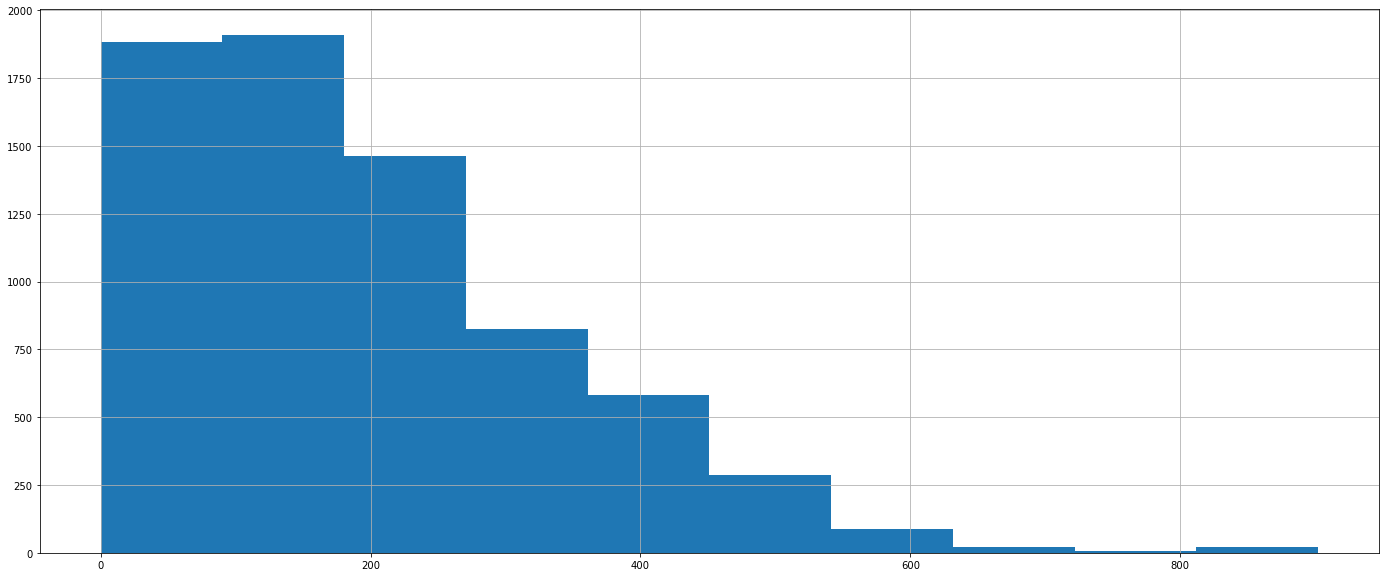

In [15]:
# Histogram of Energy
df['Energy (kcal)'].hist(figsize=(24, 10))
plt.show()

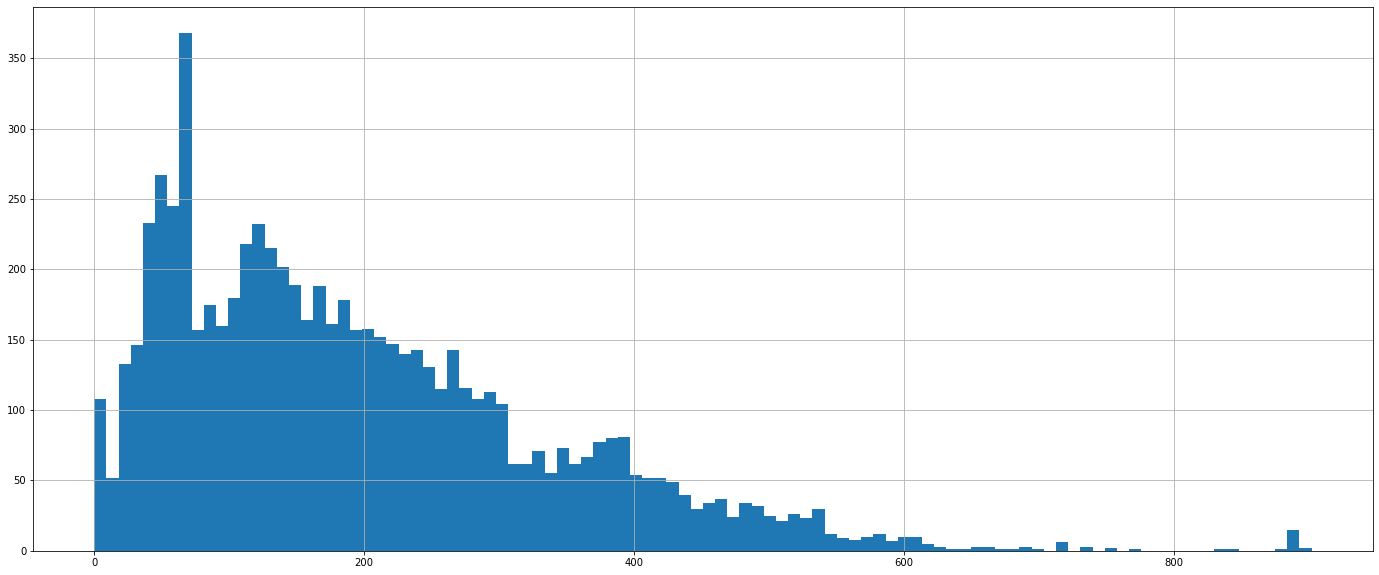

In [16]:
# Histogram of Energy divided into 100 bins
df['Energy (kcal)'].hist(figsize=(24, 10), bins=100)
plt.show()

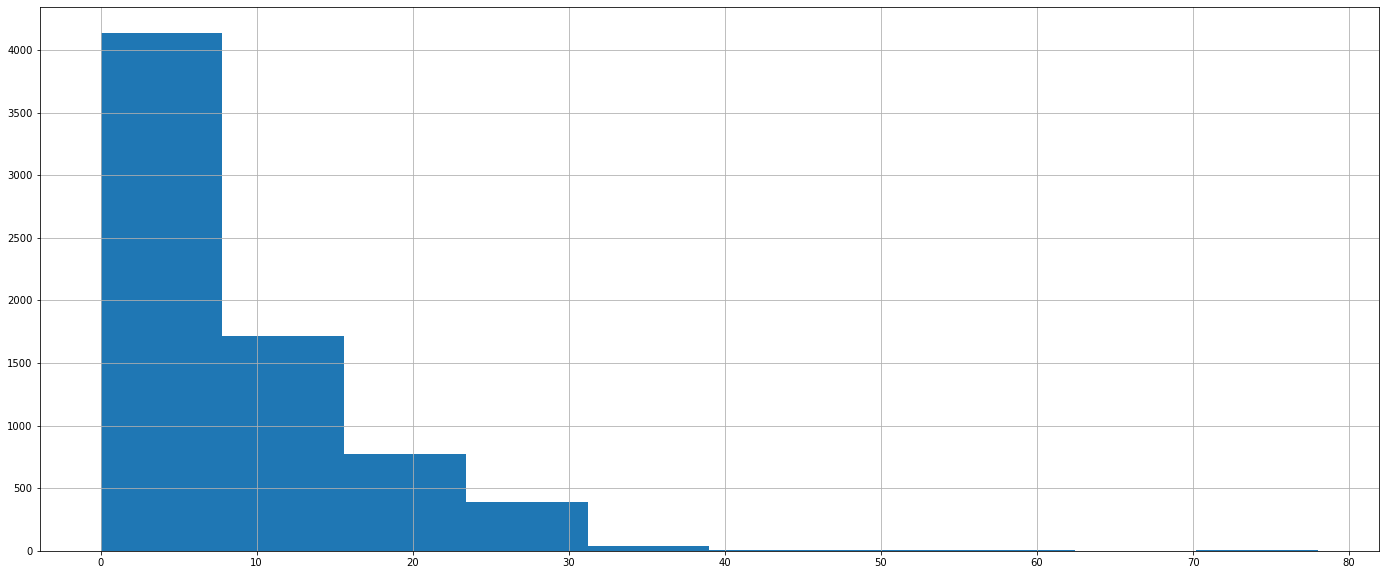

In [17]:
# Histogram of Protein divided
df['Protein (g)'].hist(figsize=(24, 10))
plt.show()

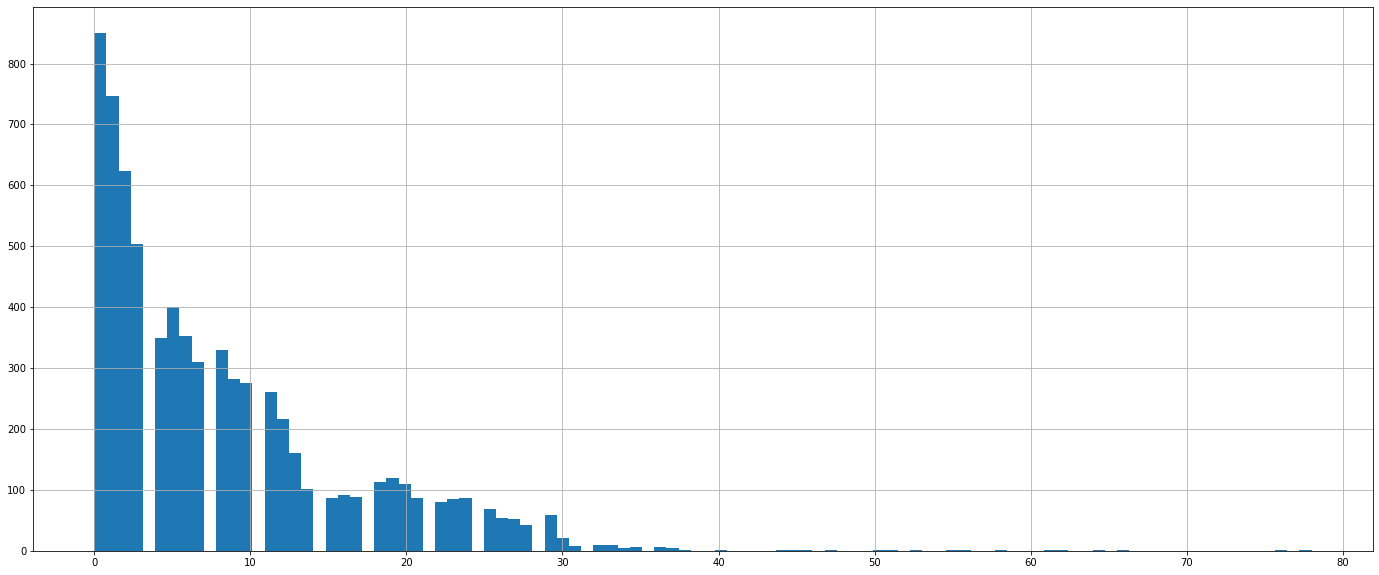

In [18]:
# Histogram of Protein divided into 100 bins
df['Protein (g)'].hist(figsize=(24, 10), bins=100)
plt.show()

<AxesSubplot:>

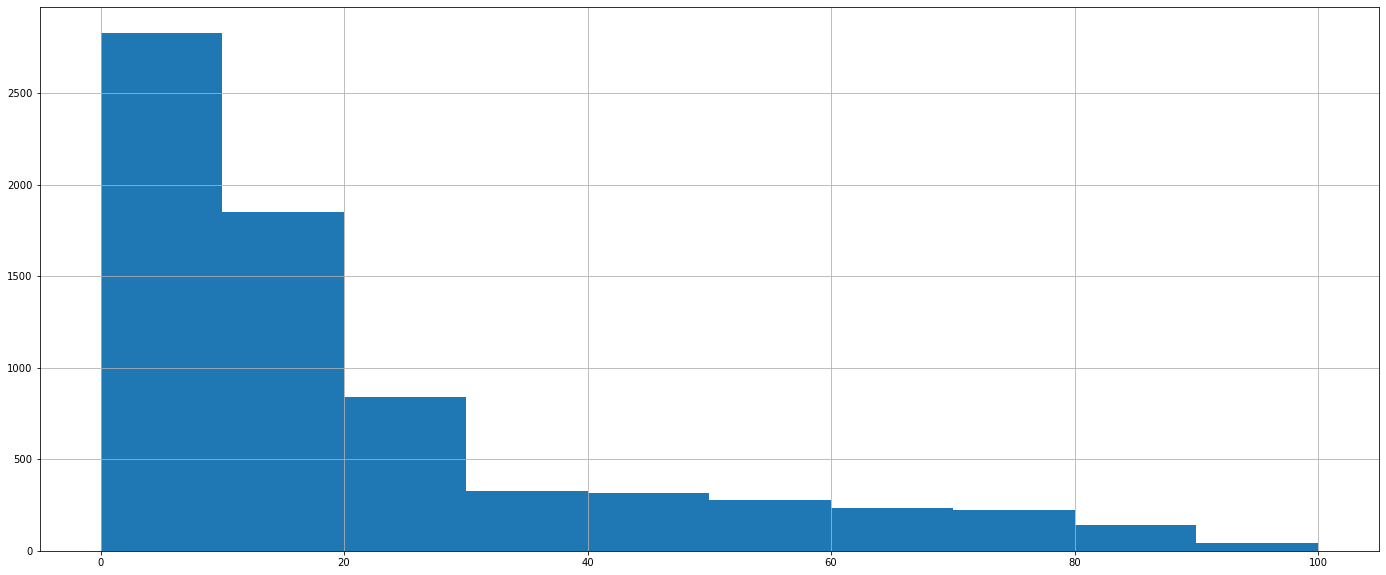

In [19]:
# Histogram of Carbohydrate divided
df['Carbohydrate (g)'].hist(figsize=(24, 10))

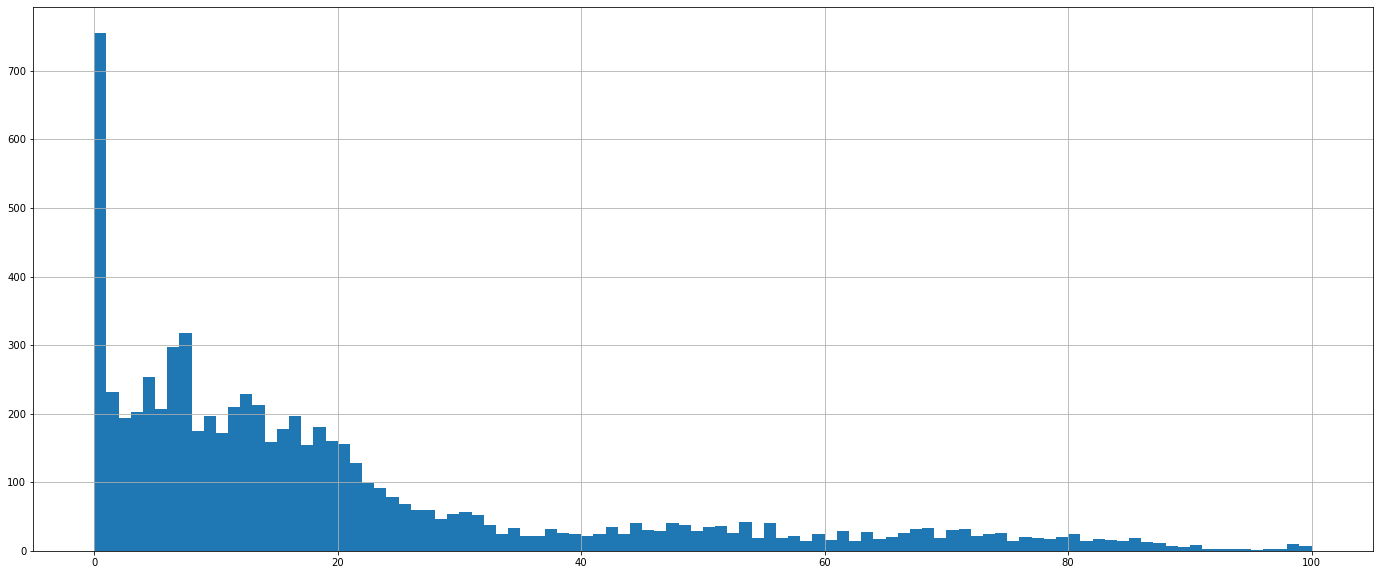

In [20]:
# Histogram of Carbohydrate divided into 100 bins
df['Carbohydrate (g)'].hist(figsize=(24, 10), bins=100)
plt.show()

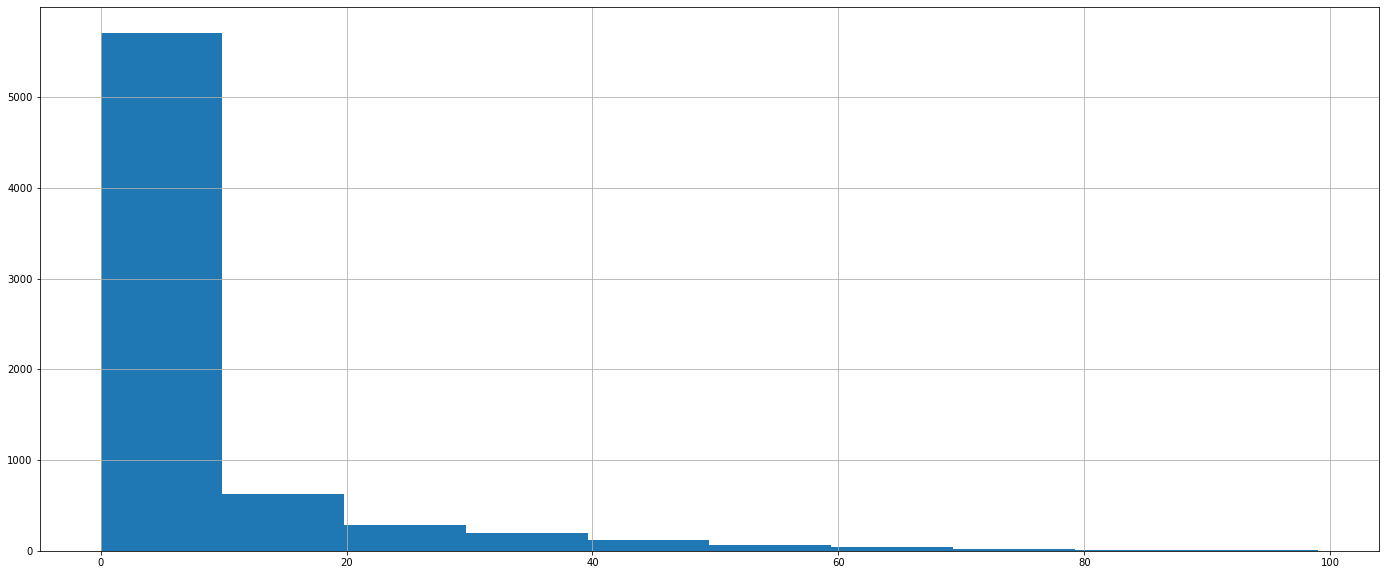

In [21]:
# Histogram of Sugars divided
df['Sugars, total\n(g)'].hist(figsize=(24, 10))
plt.show()

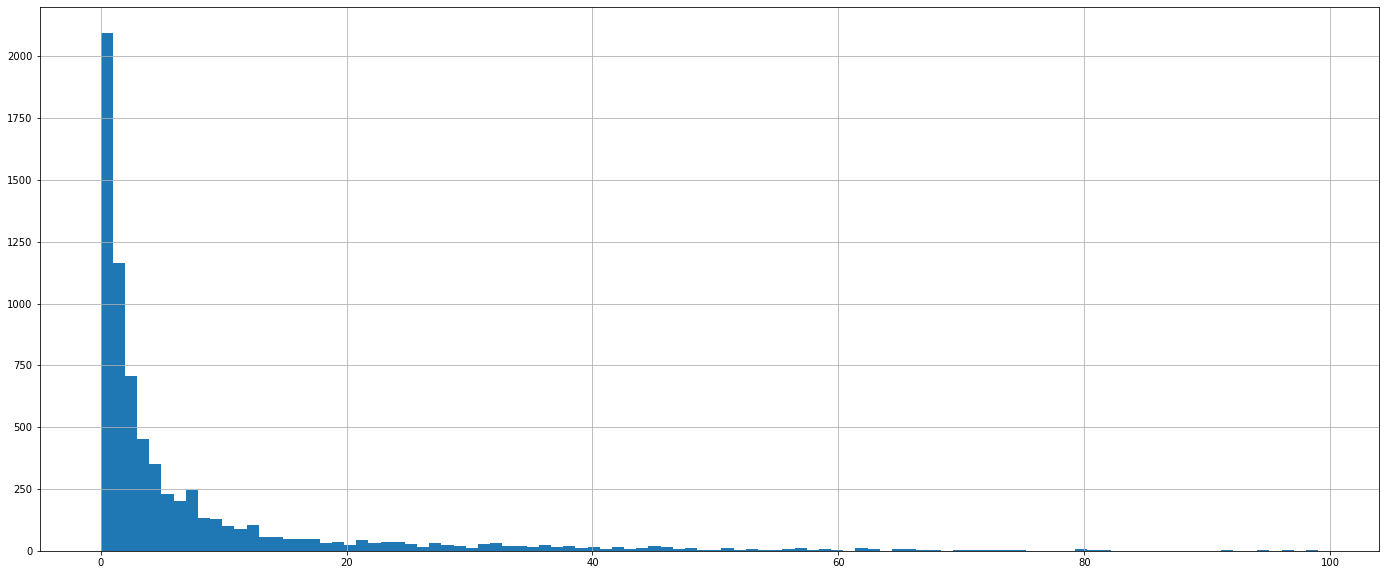

In [22]:
# Histogram of Sugars divided into 100 bins
df['Sugars, total\n(g)'].hist(figsize=(24, 10), bins=100)
plt.show()

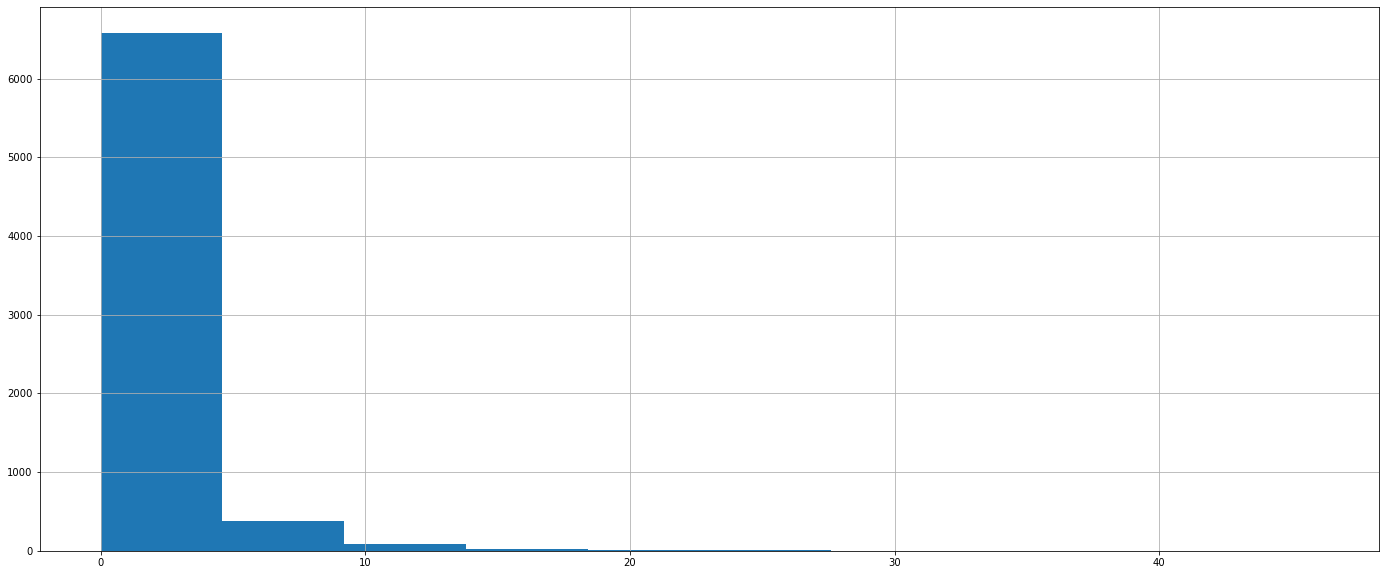

In [23]:
# Histogram of Fiber divided
df['Fiber, total dietary (g)'].hist(figsize=(24, 10))
plt.show()

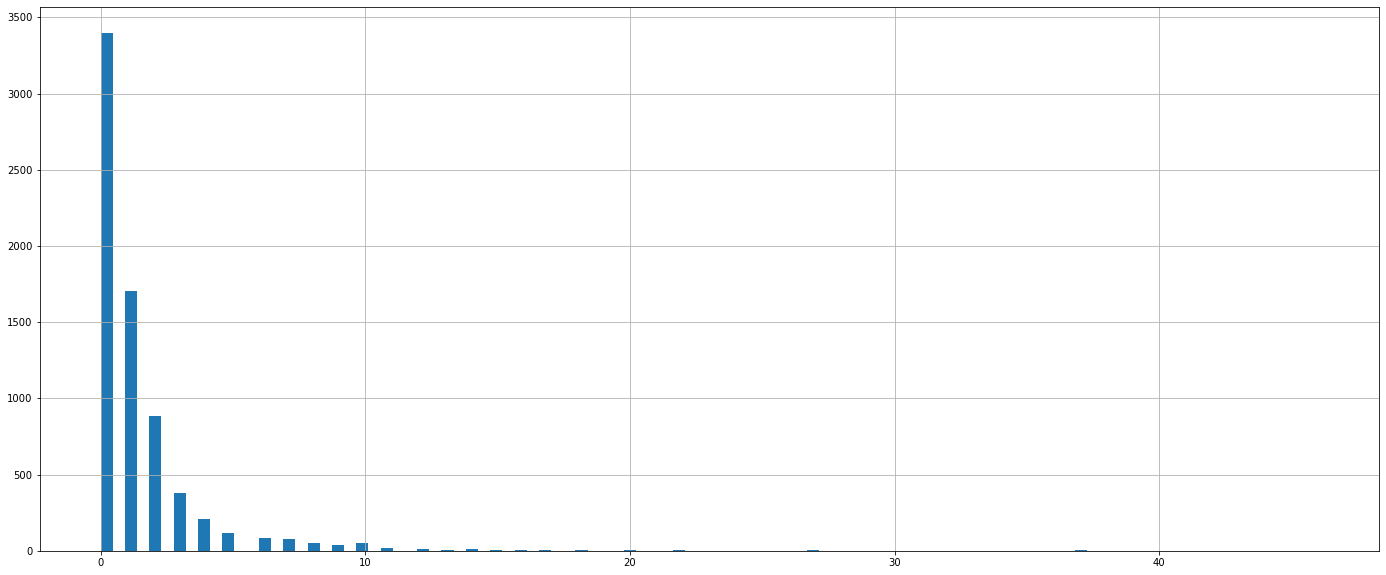

In [24]:
# Histogram of Fiber divided into 100 bins
df['Fiber, total dietary (g)'].hist(figsize=(24, 10), bins=100)
plt.show()

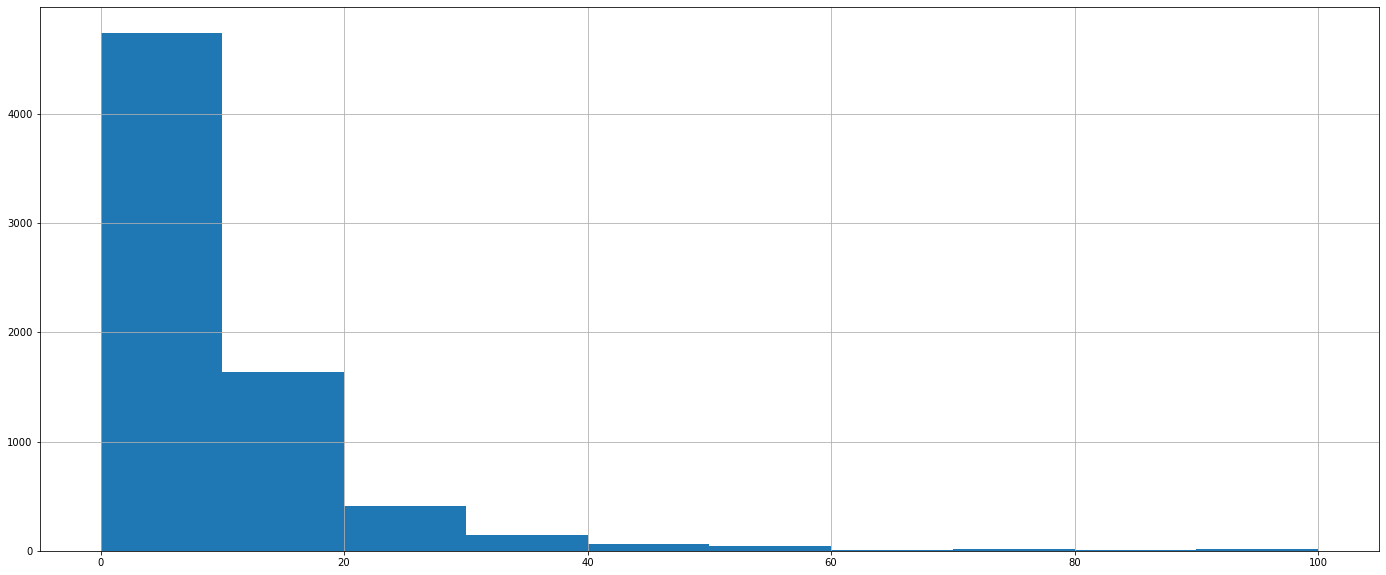

In [25]:
# Histogram of Fat divided
df['Total Fat (g)'].hist(figsize=(24, 10))
plt.show()

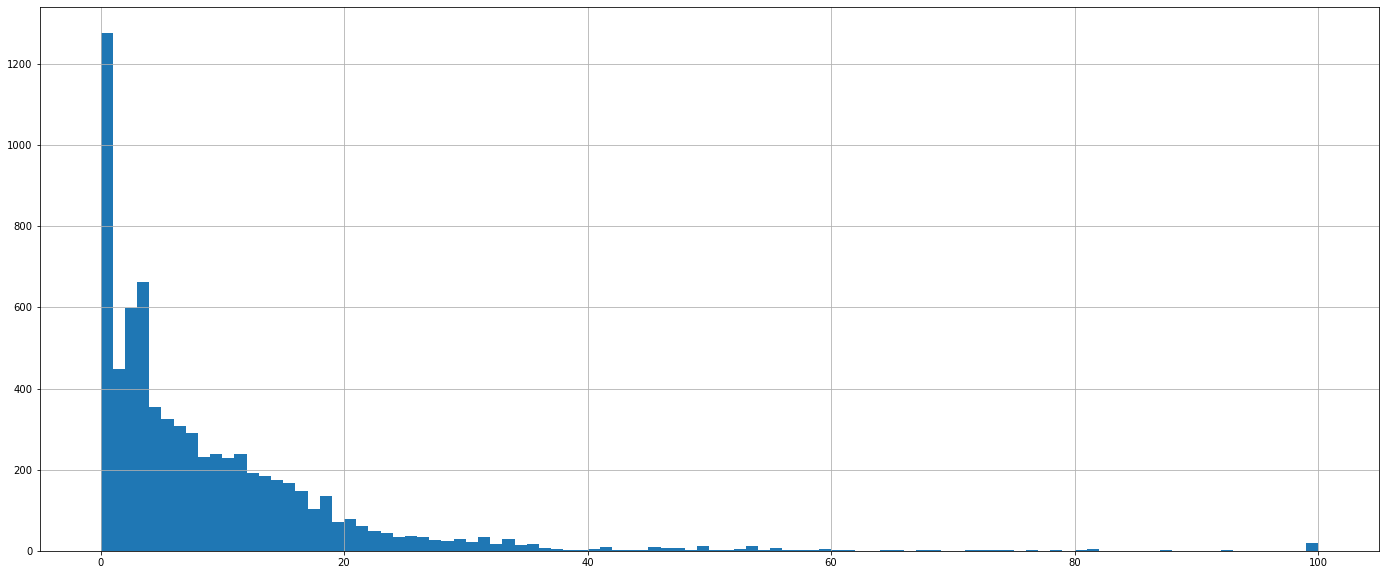

In [26]:
# Histogram of Fat divided
df['Total Fat (g)'].hist(figsize=(24, 10), bins=100)
plt.show()

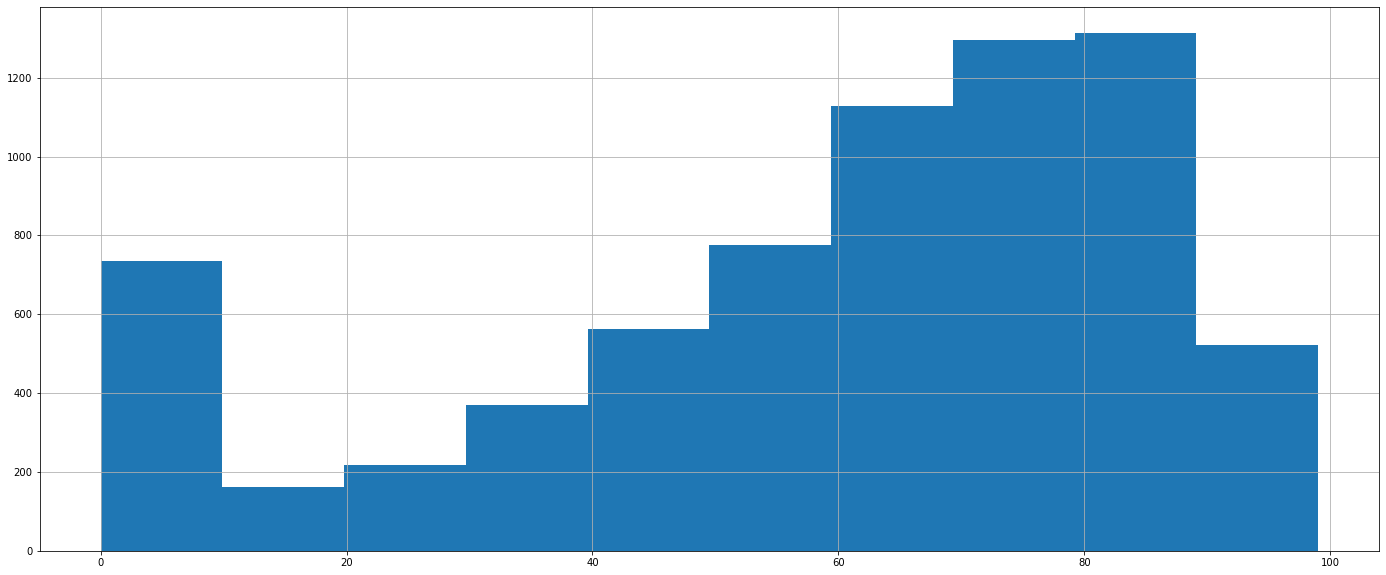

In [27]:
# Histogram of Water divided
df['Water\n(g)'].hist(figsize=(24, 10))
plt.show()

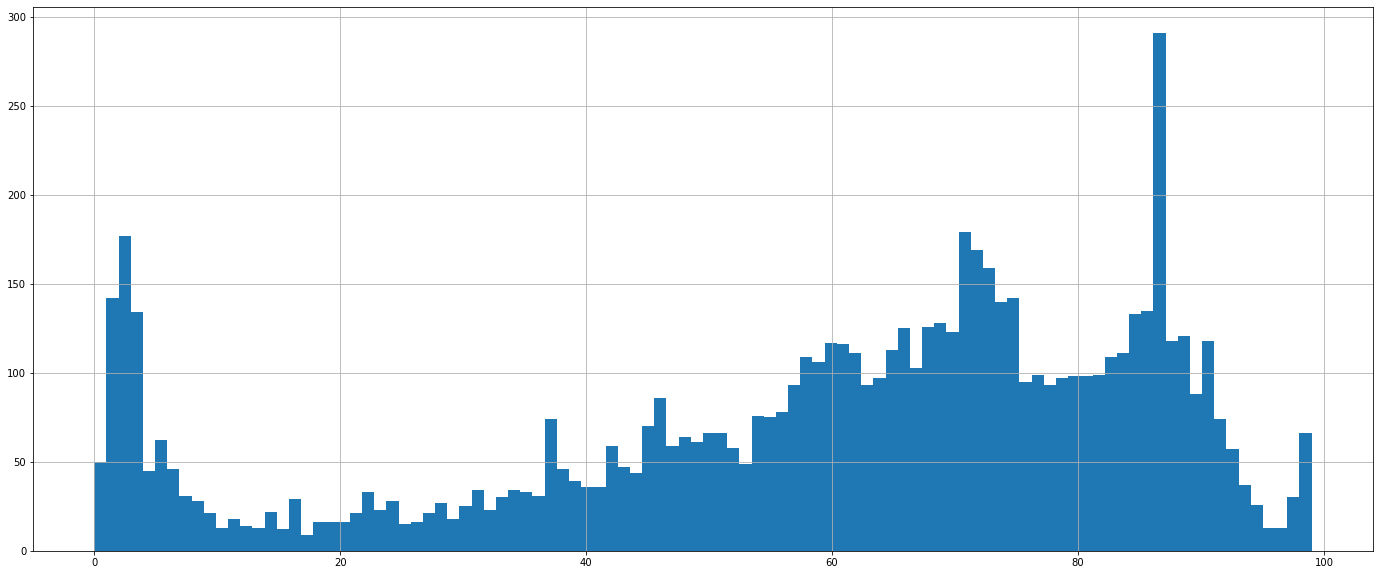

In [28]:
# Histogram of Water divided into 100 bins
df['Water\n(g)'].hist(figsize=(24, 10), bins=100)
plt.show()

In [29]:
food_types_and_nutrients = ['WWEIA Category description',
                            'Energy (kcal)', 
                            'Protein (g)', 
                            'Carbohydrate (g)', 
                            'Sugars, total\n(g)', 
                            'Fiber, total dietary (g)', 
                            'Total Fat (g)', 
                            'Water\n(g)']
# Looks like the central tendencies and 
food_types = df[food_types_and_nutrients].groupby("WWEIA Category description").agg(["min", "mean", "median", "std", "max"])
food_types.round(2)

0                                                Energy (kcal)                 \
                                                           min    mean median   
WWEIA Category description                                                      
Apple juice                                                 46   46.67   46.0   
Apples                                                      42   82.29   68.0   
Baby food: cereals                                          64  284.70  390.5   
Baby food: fruit                                            37   58.96   60.0   
Baby food: meat and dinners                                 48   81.11   69.0   
Baby food: snacks and sweets                                59  194.66   79.0   
Baby food: vegetable                                        21   42.23   37.0   
Baby food: yogurt                                           61  107.42   82.0   
Baby juice                                                  29   49.35   47.0   
Baby water                                                   0    0.00    0.0   
Bacon                                                      253  464.92  468.0   
Bagels and English muffins                                 223  244.90  250.0   
Bananas                                                     89  120.00  120.0   
Bean, pea, legume dishes                                    42  177.79  162.5   
Beans, peas, legumes                                        89  173.26  174.5   
Beef, excludes ground                                      150  227.88  229.0   
Beer                                                        27   52.56   56.0   
Biscuits, muffins, quick breads                            124  307.78  304.0   
Blueberries and other berries                               40   65.20   52.0   
Bottled water                                                0    0.00    0.0   
Broccoli                                                    22   46.20   50.0   
Burgers (single code)                                      183  278.98  288.0   
Burritos and tacos                                         156  203.47  205.0   
Butter and animal fats                                     474  703.36  724.0   
Cabbage                                                     13   36.18   37.0   
Cakes and pies                                             157  310.65  297.0   
Candy containing chocolate                                 366  490.41  492.0   
Candy not containing chocolate                             125  423.52  398.0   
Carrots                                                     23   52.40   49.0   
Cereal bars                                                342  430.06  415.0   
Cheese                                                     126  324.72  353.0   
Cheese sandwiches (single code)                            254  321.04  327.0   
Chicken patties, nuggets and tenders                       150  271.13  271.0   
Chicken, whole pieces                                      144  214.73  204.0   
Chicken/turkey sandwiches (single code)                    147  236.38  231.5   
Citrus fruits                                               29   45.27   46.0   
Citrus juice                                                37   50.54   42.0   
Coffee                                                       0   34.94   32.0   
Cold cuts and cured meats                                   98  221.64  200.0   
Coleslaw, non-lettuce salads                                28  113.33  111.0   
Cookies and brownies                                       337  444.86  450.0   
Corn                                                        66   90.50   88.0   
Cottage/ricotta cheese                                      71  101.75   82.0   
Crackers, excludes saltines                                329  446.60  443.0   
Cream and cream substitutes                                 59  232.11  136.0   
Cream cheese, sour cream, whipped cream                     74  221.00  212.5   
Diet soft drinks               

None of the values here appear extreme enough to be excluded and may be important for differentiation 

## Statistical Test

In [30]:
# Split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=42)

# Split validate off, 30% of what remains (24% of original df size)
# Thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)


train observations:  43626
validate observations:  18700
test observations:  15587


Setting alpha to .05

In [31]:
α = .05

#### How strong are the relationships between each of the numerical variables?

$H_0$ = Null Hypothesis - There's a significant relationship between all the nutrition categories.

$H_A$ = Alternative Hypothesis - There's not a significant relationship between all the nutrition categories.

Relationship strength between each pair of numerical variables


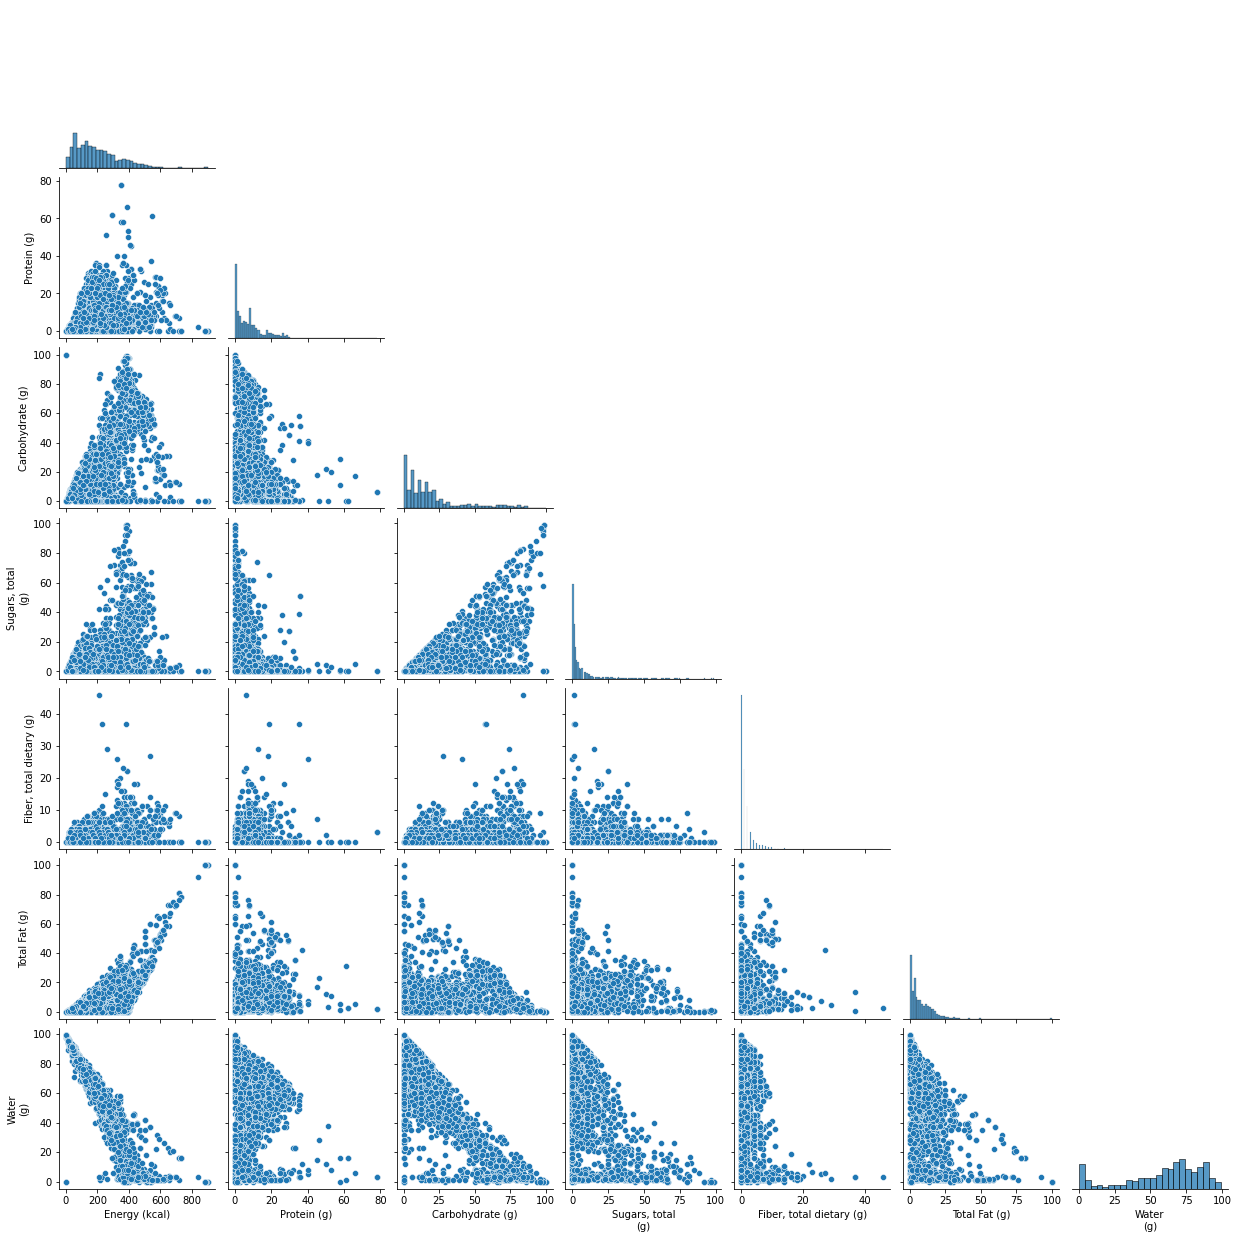

In [32]:
print("Relationship strength between each pair of numerical variables")
numerical_cols = ['Energy (kcal)', 
                  'Protein (g)', 
                  'Carbohydrate (g)', 
                  'Sugars, total\n(g)', 
                  'Fiber, total dietary (g)', 
                  'Total Fat (g)', 
                  'Water\n(g)']
sns.pairplot(train[numerical_cols], corner=True)
plt.show()


In [33]:
train.corr(method ='pearson')

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Water\n(g),Total Fat (g)'
0,,,,,,,
Energy (kcal),1.000000,0.290648,0.610322,0.395587,0.335323,-0.938025,0.794364
Protein (g),0.290648,1.000000,-0.159558,-0.218022,0.004648,-0.279453,0.206829
Carbohydrate (g),0.610322,-0.159558,1.000000,0.683807,0.475201,-0.810817,0.082720
"Sugars, total\n(g)",0.395587,-0.218022,0.683807,1.000000,0.128914,-0.513727,0.054181
"Fiber, total dietary (g)",0.335323,0.004648,0.475201,0.128914,1.000000,-0.449483,0.118090
Water\n(g),-0.938025,-0.279453,-0.810817,-0.513727,-0.449483,1.000000,-0.553442
Total Fat (g)',0.794364,0.206829,0.082720,0.054181,0.118090,-0.553442,1.000000


In [34]:
train_corr = pd.DataFrame() # Correlation matrix
train_p = pd.DataFrame()  # Matrix of p-values
for x in train[numerical_cols].columns:
    for y in train[numerical_cols].columns:
        corr = stats.pearsonr(train[x], train[y])
        train_corr.loc[x,y] = corr[0]
        train_p.loc[x,y] = corr[1]

In [35]:
train_corr

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),1.000000,0.290648,0.610322,0.395587,0.335323,0.795103,-0.938025
Protein (g),0.290648,1.000000,-0.159558,-0.218022,0.004648,0.210138,-0.279453
Carbohydrate (g),0.610322,-0.159558,1.000000,0.683807,0.475201,0.082471,-0.810817
"Sugars, total\n(g)",0.395587,-0.218022,0.683807,1.000000,0.128914,0.052370,-0.513727
"Fiber, total dietary (g)",0.335323,0.004648,0.475201,0.128914,1.000000,0.119245,-0.449483
Total Fat (g),0.795103,0.210138,0.082471,0.052370,0.119245,1.000000,-0.554345
Water\n(g),-0.938025,-0.279453,-0.810817,-0.513727,-0.449483,-0.554345,1.000000


Table showing variables with at least weak correlations in train

In [36]:
# returns boolean for absolute value greater than .25
abs(train_corr) > .25

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),True,True,True,True,True,True,True
Protein (g),True,True,False,False,False,False,True
Carbohydrate (g),True,False,True,True,True,False,True
"Sugars, total\n(g)",True,False,True,True,False,False,True
"Fiber, total dietary (g)",True,False,True,False,True,False,True
Total Fat (g),True,False,False,False,False,True,True
Water\n(g),True,True,True,True,True,True,True


Table showing variables with strong correlations in train

In [37]:
# returns boolean for absolute value greater than .75
abs(train_corr) > .75

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),True,False,False,False,False,True,True
Protein (g),False,True,False,False,False,False,False
Carbohydrate (g),False,False,True,False,False,False,True
"Sugars, total\n(g)",False,False,False,True,False,False,False
"Fiber, total dietary (g)",False,False,False,False,True,False,False
Total Fat (g),True,False,False,False,False,True,False
Water\n(g),True,False,True,False,False,False,True


Table showing the p-values for variables in train

In [38]:
train_p

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),0.000000e+00,4.652864e-78,0.000000e+00,1.040182e-148,7.997938e-105,0.000000e+00,0.000000e+00
Protein (g),4.652864e-78,0.000000e+00,4.986916e-24,6.955864e-44,7.698296e-01,8.003425e-41,4.616538e-72
Carbohydrate (g),0.000000e+00,4.986916e-24,0.000000e+00,0.000000e+00,1.303696e-222,1.982874e-07,0.000000e+00
"Sugars, total\n(g)",1.040182e-148,6.955864e-44,0.000000e+00,0.000000e+00,3.640801e-16,9.692729e-04,4.392335e-266
"Fiber, total dietary (g)",7.997938e-105,7.698296e-01,1.303696e-222,3.640801e-16,0.000000e+00,4.916750e-14,1.519184e-196
Total Fat (g),0.000000e+00,8.003425e-41,1.982874e-07,9.692729e-04,4.916750e-14,0.000000e+00,2.093564e-318
Water\n(g),0.000000e+00,4.616538e-72,0.000000e+00,4.392335e-266,1.519184e-196,2.093564e-318,0.000000e+00


Table showing p-values greater than alpha

In [39]:
# Shows boolean answers for train_p less than .05
train_p < α

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),True,True,True,True,True,True,True
Protein (g),True,True,True,True,False,True,True
Carbohydrate (g),True,True,True,True,True,True,True
"Sugars, total\n(g)",True,True,True,True,True,True,True
"Fiber, total dietary (g)",True,False,True,True,True,True,True
Total Fat (g),True,True,True,True,True,True,True
Water\n(g),True,True,True,True,True,True,True


Table showing where there are statistically signifcant correlations that are at least weakly correllated.

In [40]:
# Returns boolean answers where both train_corr is greater than .25 and train_p
# is less than alpha
(abs(train_corr) > .25) & (train_p < α)

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),True,True,True,True,True,True,True
Protein (g),True,True,False,False,False,False,True
Carbohydrate (g),True,False,True,True,True,False,True
"Sugars, total\n(g)",True,False,True,True,False,False,True
"Fiber, total dietary (g)",True,False,True,False,True,False,True
Total Fat (g),True,False,False,False,False,True,True
Water\n(g),True,True,True,True,True,True,True


### Summary
Most values have at least a weak statisticaly significant correlation except for the following combinations which reject the Null Hypothesis:
- Protein & Carbohydrate
- Protein & Sugars
- Protein & Fiber
- Protein & Total Fat
- Carbohydrate & Total Fat
- Sugars & Fiber
- Sugars & Total Fat
- Fiber & Total Fat

In [41]:
train

,Food code,Main food description,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g),Total Fat (g)'
637,14650180,Alfredo sauce with poultry,"Dips, gravies, other sauces",153,7,1,0,0,13.59,76,13
1462,26137140,"Salmon, coated, fried, made with oil",Fish,253,20,9,0,0,14.08,54,14
5474,71405019,"Potato, hash brown, from fresh, with cheese",French fries and other fried white potatoes,221,5,16,1,1,15.49,61,15
765,22201400,"Pork steak or cutlet, breaded or floured, frie...",Pork,306,21,16,1,1,16.72,43,16
1607,26305180,"Crab, canned",Shellfish,83,17,0,0,0,0.74,79,0
...,...,...,...,...,...,...,...,...,...,...,...
5653,72128223,"Turnip greens, canned, cooked, fat added",Other dark green vegetables,41,1,2,0,1,2.81,91,2
2774,32130680,"Egg omelet or scrambled egg, with cheese, toma...",Eggs and omelets,185,11,1,0,0,14.47,70,14
7012,95201500,"Nutritional powder mix, high protein (Herbalife)",Protein and nutritional powders,392,53,20,3,0,10.71,8,10
1147,25112200,"Liver paste or pate, chicken",Liver and organ meats,201,13,6,0,0,13.1,65,13


## Scale Data

In [42]:
def scale_food(train, validate, test,
                 cols_to_scale = ['Energy (kcal)', 
                                  'Protein (g)', 
                                  'Carbohydrate (g)', 
                                  'Sugars, total\n(g)', 
                                  'Fiber, total dietary (g)', 
                                  'Total Fat (g)', 
                                  'Water\n(g)']):
    
    '''
    Accepts train, validate, and test as inputs from split data then returns scaled versions for each one using Robust Scaler.
    '''
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = sklearn.preprocessing.MinMaxScaler()

    scaler.fit(train[cols_to_scale])
    
    train_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(train[cols_to_scale]), columns=train[cols_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(validate[cols_to_scale]), columns=validate[cols_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(test[cols_to_scale]), columns=test[cols_to_scale].columns.values).set_index([test.index.values])
    
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[cols_to_scale], bins=25, ec='black')
    plt.title('Original')
    plt.subplot(122)
    plt.hist(train_scaled[cols_to_scale], bins=25, ec='black')
    plt.title('Scaled')
    
    return train_scaled, validate_scaled, test_scaled

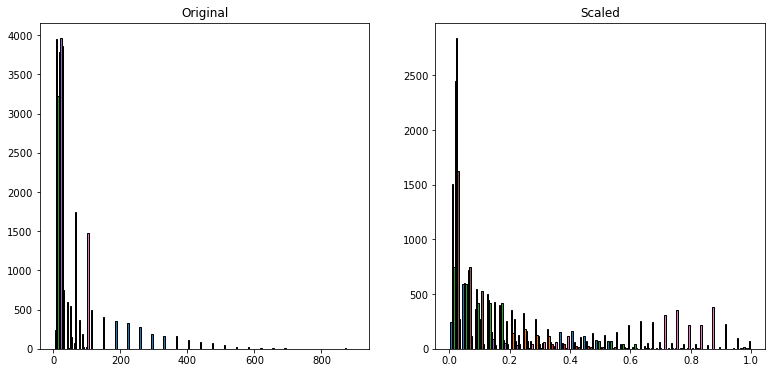

In [43]:
scaled_train, scaled_validate, scaled_test = scale_food(train, validate, test)

## Clustering Models

In [44]:
list(df.columns.values.tolist())

['Food code',
 'Main food description',
 'WWEIA Category description',
 'Energy (kcal)',
 'Protein (g)',
 'Carbohydrate (g)',
 'Sugars, total\n(g)',
 'Fiber, total dietary (g)',
 'Total Fat (g)',
 'Water\n(g)',
 "Total Fat (g)'"]

In [45]:
cols_to_scale = numerical_cols

# Isolating numerical columns from train, validate, and test datasets
scaled_train = scaled_train[cols_to_scale]

scaled_validate = scaled_validate[cols_to_scale]

scaled_test = scaled_test[cols_to_scale]

scaled_set = [scaled_train, scaled_validate, scaled_test]

Uses clustering model K-Means on numerical columns

In [46]:
def find_k(X_train, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df


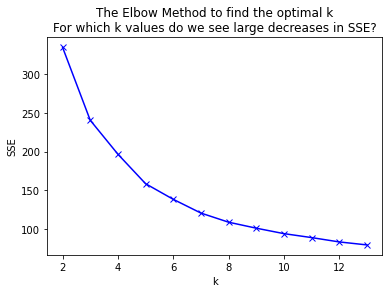

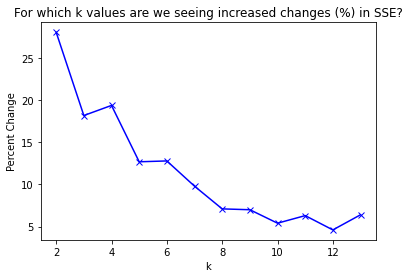

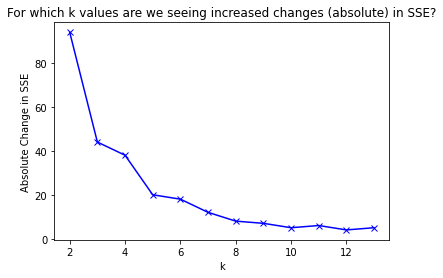

,k,sse,delta,pct_delta
0,2,334.614091,94.0,28.1
1,3,240.461417,44.0,18.2
2,4,196.673477,38.0,19.4
3,5,158.597572,20.0,12.7
4,6,138.426615,18.0,12.8
5,7,120.688178,12.0,9.8
6,8,108.909351,8.0,7.1
7,9,101.185334,7.0,7.0
8,10,94.146752,5.0,5.4
9,11,89.044663,6.0,6.3


In [47]:
k_range = range(2,15)
cluster_name = 'nutrient_cluster'
cluster_vars = numerical_cols
find_k(scaled_train, cluster_vars, k_range)

Using the elbow method it appears that the point where K appears to drop off is around 7, which is what I'll use for k going forward

In [48]:
k = 7

In [49]:
def cluster_maker(scaled_train, k, cluster_vars):
    # Creates a K-Means object with n = 7 and random state = 14
    kmeans = KMeans(n_clusters=7, random_state = 14)

    # Fits the K-Means obect the scaled training data
    kmeans.fit(scaled_train[cluster_vars])

    return kmeans

In [50]:
kmeans = cluster_maker(scaled_train, k, cluster_vars)

In [51]:
# # Makes predictions with scaled training data and adds column for clusters as 'cluster' to original train df
scaled_train['cluster'] = kmeans.predict(scaled_train[cluster_vars])
scaled_train

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g),cluster
637,0.169623,0.089744,0.01,0.000000,0.000000,0.1359,0.767677,2
1462,0.280488,0.256410,0.09,0.000000,0.000000,0.1408,0.545455,5
5474,0.245011,0.064103,0.16,0.010101,0.021739,0.1549,0.616162,2
765,0.339246,0.269231,0.16,0.010101,0.021739,0.1672,0.434343,5
1607,0.092018,0.217949,0.00,0.000000,0.000000,0.0074,0.797980,0
...,...,...,...,...,...,...,...,...
5653,0.045455,0.012821,0.02,0.000000,0.021739,0.0281,0.919192,0
2774,0.205100,0.141026,0.01,0.000000,0.000000,0.1447,0.707071,5
7012,0.434590,0.679487,0.20,0.030303,0.000000,0.1071,0.080808,1
1147,0.222838,0.166667,0.06,0.000000,0.000000,0.1310,0.656566,5


In [52]:
# get the centroids for each distinct cluster...
def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df

In [53]:
food_centroids = get_centroids(kmeans, cluster_vars, cluster_name)

In [54]:
# label cluster for each observation in scaled_train, scaled_validate, & scaled_test

def assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df):
    for i in range(len(scaled_set)):
        clusters = pd.DataFrame(kmeans.predict(scaled_set[i][cluster_vars]), 
                            columns=[cluster_name], index=scaled_set[i].index)

        clusters_centroids = clusters.merge(centroid_df, on=cluster_name, copy=False).set_index(clusters.index.values)

        scaled_set[i] = pd.concat([scaled_set[i], clusters_centroids], axis=1)
    return scaled_set


In [55]:
# fit kmeans 
kmeans = cluster_maker(scaled_train, k, cluster_vars)

# get centroid values per variable per cluster
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

# get cluster assignments and append those with centroids for each X partition (train, validate, test)
scaled_set = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df)


In [56]:
scaled_set

[      Energy (kcal)  Protein (g)  Carbohydrate (g)  Sugars, total\n(g)  \
 637        0.169623     0.089744              0.01            0.000000   
 1462       0.280488     0.256410              0.09            0.000000   
 5474       0.245011     0.064103              0.16            0.010101   
 765        0.339246     0.269231              0.16            0.010101   
 1607       0.092018     0.217949              0.00            0.000000   
 ...             ...          ...               ...                 ...   
 5653       0.045455     0.012821              0.02            0.000000   
 2774       0.205100     0.141026              0.01            0.000000   
 7012       0.434590     0.679487              0.20            0.030303   
 1147       0.222838     0.166667              0.06            0.000000   
 2570       0.116408     0.089744              0.11            0.010101   
 
       Fiber, total dietary (g)  Total Fat (g)  Water\n(g)  cluster  \
 637                   0.00

In [57]:
pd.DataFrame(scaled_set[0].groupby(['nutrient_cluster', 
                                    'centroid_Energy (kcal)', 
                                    'centroid_Protein (g)',
                                    'centroid_Carbohydrate (g)',
                                    'centroid_Sugars, total\n(g)',
                                    'centroid_Fiber, total dietary (g)',
                                    'centroid_Total Fat (g)',
                                    'centroid_Water\n(g)'])['nutrient_cluster'].count())


,,,,,,,,nutrient_cluster
nutrient_cluster,centroid_Energy (kcal),centroid_Protein (g),centroid_Carbohydrate (g),"centroid_Sugars, total (g)","centroid_Fiber, total dietary (g)",centroid_Total Fat (g),centroid_Water (g),
0,0.062990,0.027853,0.072291,0.040722,0.014336,0.017442,0.872154,1109
1,0.317237,0.118528,0.345097,0.082714,0.041600,0.120601,0.407782,567
2,0.164924,0.070381,0.161496,0.029475,0.026261,0.063347,0.693886,981
3,0.448990,0.053407,0.713690,0.532275,0.041502,0.119771,0.094042,187
4,0.461945,0.105613,0.673388,0.156253,0.122504,0.140074,0.064883,307
5,0.237446,0.264416,0.046328,0.006715,0.002751,0.117735,0.602239,718
6,0.678207,0.154904,0.120309,0.032386,0.079785,0.590561,0.131105,97


In [58]:
scaled_train.dtypes

0
Energy (kcal)               float64
Protein (g)                 float64
Carbohydrate (g)            float64
Sugars, total\n(g)          float64
Fiber, total dietary (g)    float64
Total Fat (g)               float64
Water\n(g)                  float64
cluster                       int32
dtype: object

<Figure size 1728x720 with 0 Axes>

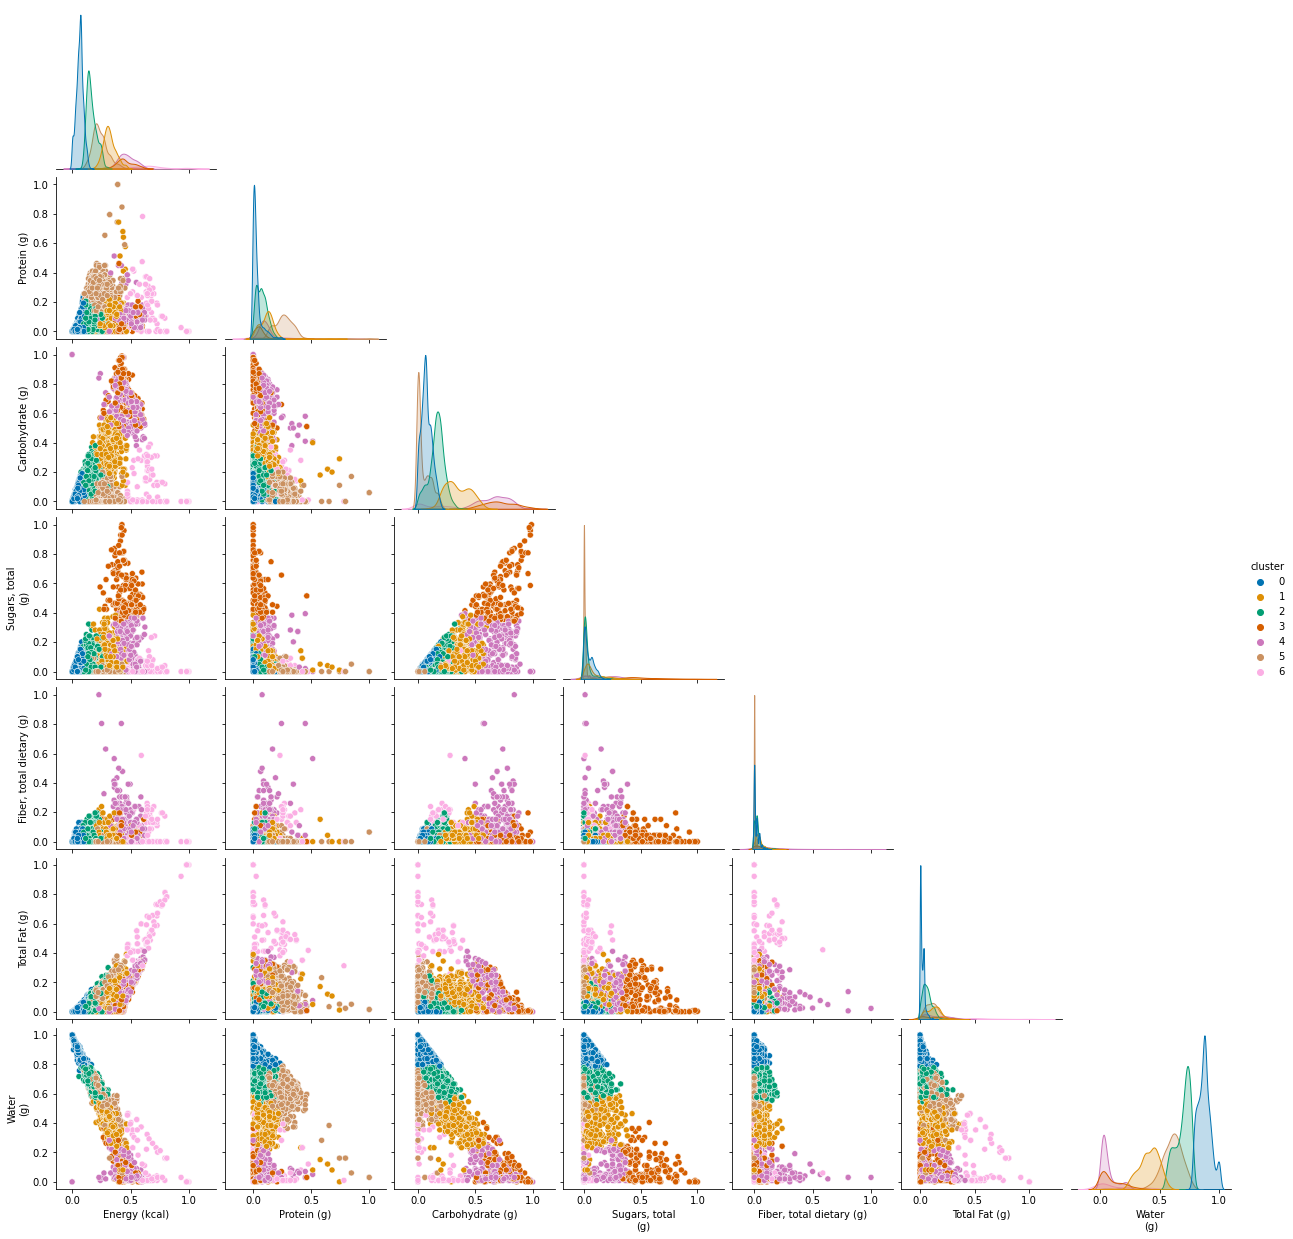

In [59]:
plt.figure(figsize=(24, 10))
# 
sns.pairplot(scaled_train, hue='cluster', palette='colorblind', corner=True)
plt.show()

## Statistical Test Using Clusters

In [60]:
cluster_0 = scaled_train[scaled_train.cluster == 0]['Energy (kcal)']
cluster_1 = scaled_train[scaled_train.cluster == 1]['Energy (kcal)']
cluster_2 = scaled_train[scaled_train.cluster == 2]['Energy (kcal)']
cluster_3 = scaled_train[scaled_train.cluster == 3]['Energy (kcal)']
cluster_4 = scaled_train[scaled_train.cluster == 4]['Energy (kcal)']
cluster_5 = scaled_train[scaled_train.cluster == 5]['Energy (kcal)']
cluster_6 = scaled_train[scaled_train.cluster == 6]['Energy (kcal)']

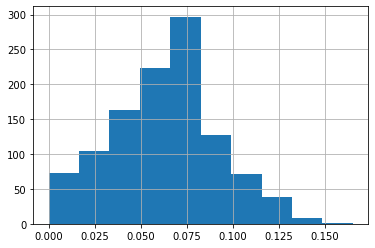

Variance = 0.0008710472783399689


In [61]:
cluster_0.hist()
plt.show()

print(f'Variance is {cluster_0.var()}')

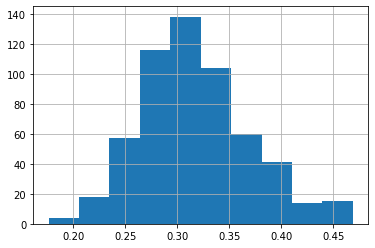

Variance = 0.002788290846391117


In [62]:
cluster_1.hist()
plt.show()

print(f'Variance is {cluster_1.var()}')

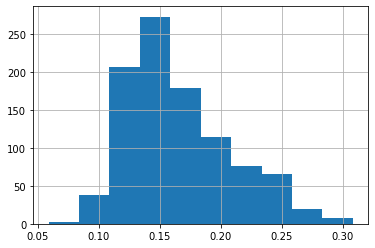

Variance = 0.0018134144092218796


In [63]:
cluster_2.hist()
plt.show()

print(f'Variance is {cluster_2.var()}')

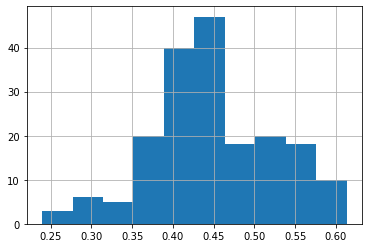

Variance = 0.005598044359230595


In [64]:
cluster_3.hist()
plt.show()

print(f'Variance is {cluster_3.var()}')

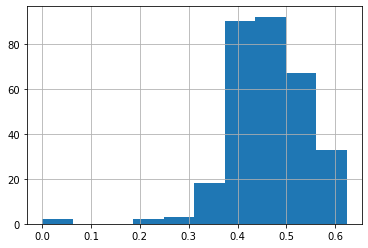

Variance = 0.006478651715125542


In [65]:
cluster_4.hist()
plt.show()

print(f'Variance is {cluster_4.var()}')

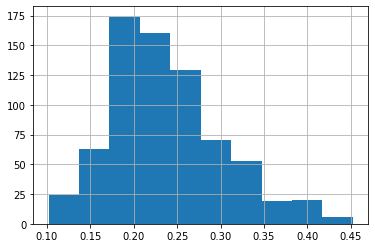

Variance = 0.004101835575713053


In [66]:
cluster_5.hist()
plt.show()

print(f'Variance is {cluster_5.var()}')

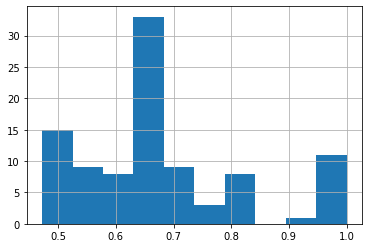

Variance = 0.020598915400656514


In [67]:
cluster_6.hist()
plt.show()

print(f'Variance is {cluster_6.var()}')

#### What's the relationship between the clusters and the food nutrients?

$H_0$ = Null Hypothesis - There's a significant strong relationship between the clusters of  different food nutrient categories.

$H_A$ = Alternative Hypothesis - There's not a significant strong relationship between the clusters of different food nutrient categories.


### ANOVA Analysis of Variance

Setting alpha to .05

In [68]:
α = .05

#### Verifying Assumptions
- Clusters are independent samples
- Cluster distributions appear to be roughly normal on average
- Cluster variances are very tiny

In [70]:
f, p = stats.f_oneway(cluster_0, cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6)
f, p

(4526.142796166877, 0.0)

In [75]:
if p < α:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")

We reject the Null Hypothesis
